In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw10.ipynb")

<img src="data8logo.png" alt="Data 8 Logo" style="width: 15%; float: right; padding: 1%; margin-right: 2%;"/>

# Homework 10: Linear Regression

**Helpful Resource:**

- [Python Reference](http://data8.org/fa24/reference/): Cheat sheet of helpful array & table methods used in Data 8!

**Recommended Readings**: 

* [Correlation](https://inferentialthinking.com/chapters/15/1/Correlation.html)
* [The Regression Line](https://www.inferentialthinking.com/chapters/15/2/Regression_Line.html)
* [Method of Least Squares](https://www.inferentialthinking.com/chapters/15/3/Method_of_Least_Squares.html)
* [Least Squares Regression](https://www.inferentialthinking.com/chapters/15/4/Least_Squares_Regression.html)

Please complete this notebook by filling in the cells provided. **Before you begin, execute the cell below to setup the notebook by importing some helpful libraries.** Each time you start your server, you will need to execute this cell again.

For all problems that you must write explanations and sentences for, you **must** provide your answer in the designated space. Moreover, throughout this homework and all future ones, **please be sure to not re-assign variables throughout the notebook!** For example, if you use `max_temperature` in your answer to one question, do not reassign it later on. Otherwise, you will fail tests that you thought you were passing previously!

**Deadline:**

This assignment is **due Wednesday, 11/13 at 5:00pm PT**. Submissions after this time will be accepted for 24 hours and will incur a 20% penalty. Any submissions later than this 24 hour period will not be accepted unless an extension has been granted as per the [policies](http://data8.org/fa24/policies/) page. Turn it in by Tuesday, 11/12 at 5:00pm PT for 5 extra credit points.

<span style="color:red">**Note: This homework has hidden tests on it. That means even though tests may say 100% passed, it doesn't mean your final grade will be 100%. We will be running more tests for correctness once everyone turns in the homework.**</span>

Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged. Refer to the [policies](http://data8.org/fa24/policies/#learning-cooperatively) page to learn more about how to learn cooperatively.

You should start early so that you have time to get help if you're stuck. Office hours are held Monday through Friday in [Warren Hall](https://www.berkeley.edu/map?warren) 101B. The office hours schedule appears [here](http://data8.org/fa24/officehours/).

---

The point breakdown for this assignment is given in the table below:
| Category | Points |
| --- | --- |
| Autograder (Coding questions) | 56 |
| Written | 44 |
| **Total** | 100 |

In [2]:
# Run this cell to set up the notebook, but please don't change it.

import numpy as np
from datascience import * 

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)
from datetime import datetime

/Users/thanglee/something beautiful/uni_datascience/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## 1. Linear Regression Setup

When performing linear regression, we need to compute several important quantities which will be used throughout our analysis. **Unless otherwise specified when asked to make a prediction please assume we are predicting y from x throughout this assignment.** To help with our later analysis, we will begin by writing some of these functions and understanding what they can do for us.

---

**Question 1.1.** Define a function `standard_units` that converts a given array to standard units. **(3 points)**

*Hint:* You may find the `np.mean` and `np.std` functions helpful.


In [3]:
def standard_units(data):
    return (data - np.mean(data)) / np.std(data)

In [4]:
grader.check("q1_1")

q1_1 results: All test cases passed!

---

**Question 1.2.** Which of the following are true about standard units? Assume we have converted an array of data into standard units using the function above. **(5 points)**

1. The unit of all our data when converted into standard units is the same as the unit of the original data.
2. The sum of all our data when converted into standard units is 0.
3. The standard deviation of all our data when converted into standard units is 1.
4. Adding a constant, C, to our original data has no impact on the resultant data when converted to standard units.
5. Multiplying our original data by a positive constant, C (>0), has no impact on the resultant data when converted to standard units.

Assign `standard_array` to an array of your selections, in increasing numerical order. For example, if you wanted to select options 1, 3, and 5,
you would assign `standard_array` to `make_array(1, 3, 5)`.


In [5]:
standard_array = make_array(2,3,4,5)

In [6]:
grader.check("q1_2")

q1_2 results: All test cases passed!

---

**Question 1.3.** Define a function `correlation` that computes the correlation between 2 arrays of data in original units. **(3 points)**

*Hint:* Feel free to use functions you have defined previously.


In [7]:
def correlation(x, y):
    x_su = standard_units(x)
    y_su = standard_units(y)
    return np.mean(x_su * y_su)

In [8]:
grader.check("q1_3")

q1_3 results: All test cases passed!

---

**Question 1.4.** Which of the following are true about the correlation coefficient $r$? **(5 points)**

1. The correlation coefficient measures the strength of a linear relationship.
2. When looking at the existing data, a correlation coefficient of 1.0 means an increase in one variable always means an increase in the other variable.
3. The correlation coefficient is the slope of the regression line in standard units.
4. The correlation coefficient stays the same if we swap our x-axis and y-axis.
5. If we add a constant, C, to our original data, our correlation coefficient will increase by the same C.

Assign `r_array` to an array of your selections, in increasing numerical order. For example, if you wanted to select options 1, 3, and 5,
you would assign `r_array` to `make_array(1, 3, 5)`.


In [9]:
r_array = make_array(1,2,3,4)

In [10]:
grader.check("q1_4")

q1_4 results: All test cases passed!

---

**Question 1.5.** Define a function `slope` that computes the slope of our line of best fit (to predict y given x), given two arrays of data in original units. Assume we want to create a line of best fit in original units. **(3 points)**

*Hint:* Feel free to use functions you have defined previously.


In [11]:
def slope(x, y):
    r = correlation(x, y)
    return r * np.std(y) / np.std(x)

In [12]:
grader.check("q1_5")

q1_5 results: All test cases passed!

---

**Question 1.6.** Which of the following are true about the slope of our line of best fit? Assume `x` refers to the value of one variable that we use to predict the value of `y`. **(5 points)**

1. In original units, the slope has the unit: unit of x / unit of y.
2. In standard units, the slope is unitless.
3. In original units, the slope is unchanged by swapping x and y.
4. In standard units, a slope of 1 means our data is perfectly linearly correlated.
5. In original units and standard units, the slope always has the same positive or negative sign.

Assign `slope_array` to an array of your selections, in increasing numerical order. For example, if you wanted to select options 1, 3, and 5,
you would assign `slope_array` to `make_array(1, 3, 5)`.


In [13]:
slope_array = make_array(2,4,5)

In [14]:
grader.check("q1_6")

q1_6 results: All test cases passed!

---

**Question 1.7.** Define a function `intercept` that computes the intercept of our line of best fit (to predict y given x), given 2 arrays of data in original units. Assume we want to create a line of best fit in original units. **(3 points)**

*Hint:* Feel free to use functions you have defined previously.


In [15]:
def intercept(x, y):
    return np.mean(y) - slope(x,y) * np.mean(x)


In [16]:
grader.check("q1_7")

q1_7 results: All test cases passed!

---

**Question 1.8.** Which of the following are true about the intercept of our line of best fit? Assume `x` refers to the value of one variable that we use to predict the value of `y`. **(5 points)**

1. In original units, the intercept has the same unit as the y values.
2. In original units, the intercept has the same unit as the x values.
3. In original units, the slope and intercept have the same unit.
4. In standard units, the intercept for the regression line is 0.
5. In original units and standard units, the intercept always has the same numerical value.

Assign `intercept_array` to an array of your selections, in increasing numerical order. For example, if you wanted to select options 1, 3, and 5,
you would assign `intercept_array` to `make_array(1, 3, 5)`.


In [17]:
intercept_array = make_array(1,4)

In [18]:
grader.check("q1_8")

q1_8 results: All test cases passed!

---

**Question 1.9.** Define a function `predict` that takes in a table and 2 column names, and returns an array of predictions. The predictions should be created using a fitted **regression line**. We are predicting `"col2"` from `"col1"`, both in original units. **(5 points)**

*Hint 1:* Feel free to use functions you have defined previously.

*Hint 2:* Re-reading [15.2](https://inferentialthinking.com/chapters/15/2/Regression_Line.html#the-regression-line) might be helpful here.

Note: The public tests are quite comprehensive for this question, so passing them means that your function most likely works correctly.


In [19]:
def predict(tbl, col1, col2):
    x = tbl.column(col1)
    y = tbl.column(col2)
    return slope(x,y) * x + intercept(x,y)

In [20]:
grader.check("q1_9")

q1_9 results: All test cases passed!

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## 2. FIFA Predictions

The following data was scraped from [sofifa.com](https://sofifa.com/), a website dedicated to collecting information from FIFA video games. The dataset consists of all players in FIFA 22 and their corresponding attributes. We have truncated the dataset to a limited number of rows (100) to ease with our visualizations and analysis. Since we’re learning about linear regression, we will look specifically for a linear association between various player attributes. **To help with understanding where the line of best fit generated in linear regression comes from please do not use the `.fit_line` argument in `.scatter` at any point on question 2 unless the code was provided for you.**

Feel free to read more about the video game on [Wikipedia](https://en.wikipedia.org/wiki/FIFA_22).

In [21]:
# Run this cell to load the data
fifa = Table.read_table('fifa22.csv')

# Select a subset of columns to analyze (there are 110 columns in the original dataset)
fifa = fifa.select("short_name", "overall", "value_eur", "wage_eur", "age", "pace", "shooting", "passing", "attacking_finishing")
fifa.show(5)

short_name,overall,value_eur,wage_eur,age,pace,shooting,passing,attacking_finishing
L. Messi,93,78000000,320000,34,85,92,91,95
R. Lewandowski,92,119500000,270000,32,78,92,79,95
Cristiano Ronaldo,91,45000000,270000,36,87,94,80,95
Neymar Jr,91,129000000,270000,29,91,83,86,83
K. De Bruyne,91,125500000,350000,30,76,86,93,82


<!-- BEGIN QUESTION -->

---

**Question 2.1.** Before jumping into any statistical techniques, it’s important to see what the data looks like, because data visualizations allow us to uncover patterns in our data that would have otherwise been much more difficult to see. **(3 points)**

Create a scatter plot with age on the x-axis (“age”), and the player’s value in Euros (“value_eur”) on the y-axis.


Text(0, 0.5, 'Value')

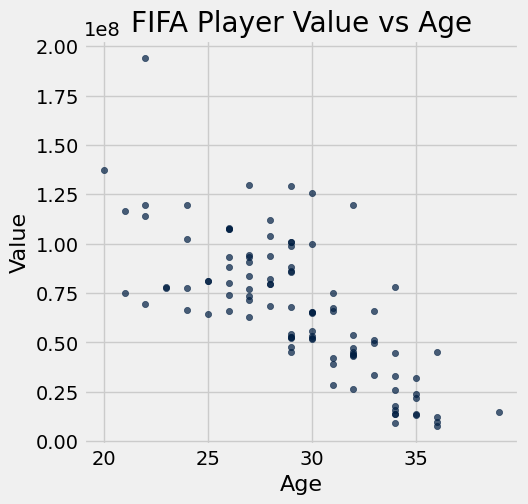

In [22]:
fifa.scatter("age", "value_eur")
plt.title("FIFA Player Value vs Age")
plt.xlabel("Age")
plt.ylabel("Value")

<!-- END QUESTION -->

---

**Question 2.2.** Does the correlation coefficient `r` for the data in our scatter plot in 2.1 look closest to 0, 0.75, or -0.75? **(3 points)**

Assign `r_guess` to one of 0, 0.75, or -0.75.


In [23]:
r_guess = 0.75

In [24]:
grader.check("q2_2")

q2_2 results: All test cases passed!

<!-- BEGIN QUESTION -->

---

**Question 2.3.** Create a scatter plot with player age ("age") along the x-axis and both real player value ("value_eur") and predicted player value along the y-axis. The predictions should be created using a fitted **regression line**. The color of the dots for the real player values should be different from the color for the predicted player values. **(8 points)**

*Hint 1:* Feel free to use functions you have defined previously.

*Hint 2:* [15.2](https://inferentialthinking.com/chapters/15/2/Regression_Line.html#) and [7.3](https://inferentialthinking.com/chapters/07/3/Overlaid_Graphs.html#overlaid-scatter-plots) has examples of creating such scatter plots.


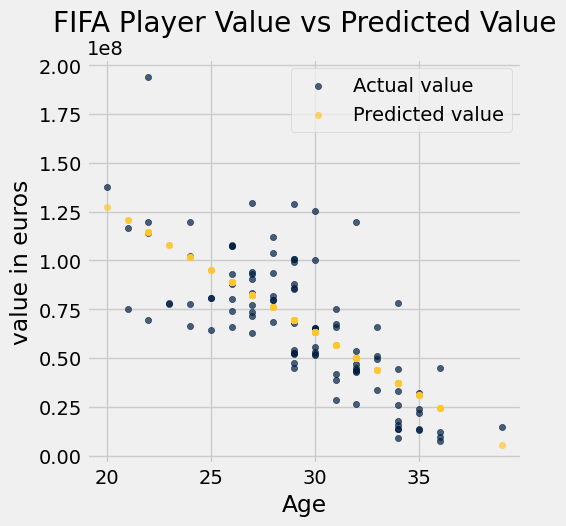

In [25]:
predictions = predict(fifa, "age", "value_eur")
fifa_with_predictions = fifa.with_column("Predicted Value", predictions)
fifa_with_predictions.scatter("age", ["value_eur", "Predicted Value"])
plt.title("FIFA Player Value vs Predicted Value")
plt.xlabel("Age")
plt.ylabel("value in euros")
plt.legend(["Actual value", "Predicted value"])
plt.grid(True)
plt.show()


p<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

---

**Question 2.4.** Looking at the scatter plot you produced above, is linear regression a good model to use? If so, what features or characteristics make this model reasonable? If not, what features or characteristics make it unreasonable? **(5 points)**


No, linear regression is a good model because the relationship between age and player value is non-linear (peaks around mid-20s). The straight-line predictions fails to capture the rise and fall in value, leading to systematic errors. A quadractic or polynomial regression would be better suited

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

---

**Question 2.5.** In 2.3, we created a scatter plot **in original units**. Now, create a scatter plot with player age **in standard units** along the x-axis and both real and predicted player value **in standard units** along the y-axis. The color of the dots of the real and predicted values should be different. **(8 points)**

*Hint:* Feel free to use functions you have defined previously.


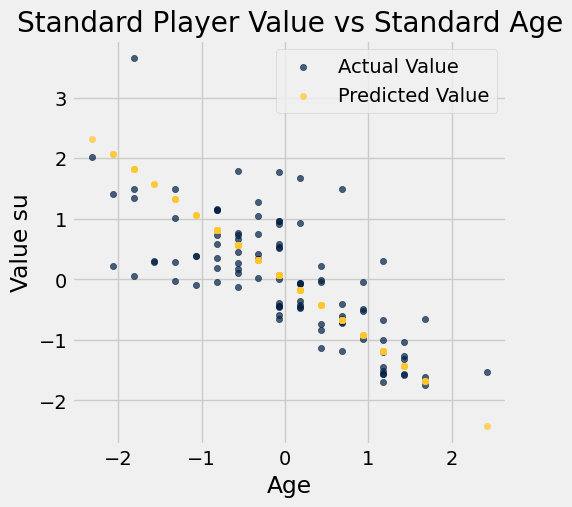

In [26]:
age_su = standard_units(fifa_with_predictions.column("age"))
value_su = standard_units(fifa_with_predictions.column("value_eur"))
predictions_su = standard_units(fifa_with_predictions.column("Predicted Value"))

fifa_su = fifa_with_predictions.with_columns(
    "Age (SU)", age_su,
    "Value (SU)", value_su,
    "Predicted Value (SU)", predictions_su,
)

fifa_su.scatter("Age (SU)", ["Value (SU)", "Predicted Value (SU)"])
plt.title("Standard Player Value vs Standard Age")
plt.xlabel("Age")
plt.ylabel("Value su")
plt.legend(["Actual Value", "Predicted Value"])
plt.grid(True)
plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

---

**Question 2.6.** Compare your plots in 2.3 and 2.5. What similarities do they share? What differences do they have? **(5 points)**


nothing but fucking stupid graphs that I have to learn to get through exams, which does nothing to what I want, fuck it, fuck this world

<!-- END QUESTION -->

---

**Question 2.7.** Define a function `rmse` that takes in two arguments: a slope and an intercept for a potential regression line. The function should return the root mean squared error between the values predicted by a regression line with the given slope and intercept and the actual outcomes. **(6 points)**

Assume we are still predicting “value_eur” from “age” in original units from the `fifa` table.


In [27]:
def rmse(slope, intercept):
    predictions = slope * fifa.column("age") + intercept
    errors = predictions - fifa.column("value_eur")
    squared_errors = errors ** 2
    mse = np.mean(squared_errors)
    return np.sqrt(mse)

In [28]:
grader.check("q2_7")

q2_7 results: All test cases passed!

<!-- BEGIN QUESTION -->

---

**Question 2.8.** Use the `rmse` function you defined along with `minimize` to find the least-squares regression parameters predicting player value from player age. Here's an [example](https://inferentialthinking.com/chapters/15/3/Method_of_Least_Squares.html#numerical-optimization) of using the `minimize` function from the textbook. **(10 points)**

Then set `lsq_slope` and `lsq_intercept` to be the least-squares regression line slope and intercept, respectively.

Finally, create a scatter plot like you did in 2.3 with player age ("age") along the x-axis and both real player value ("value_eur") and predicted player value along the y-axis. **Be sure to use your least-squares regression line to compute the predicted values.** The color of the dots for the real player values should be different from the color for the predicted player values.

> **Note:** Your solution should not make any calls to the slope or intercept functions defined earlier.

*Hint:* Your call to `minimize` will return an array of argument values that minimize the return value of the function passed to `minimize`.

Slope: -6.41462e+06 | Intercept: 2.55525e+08


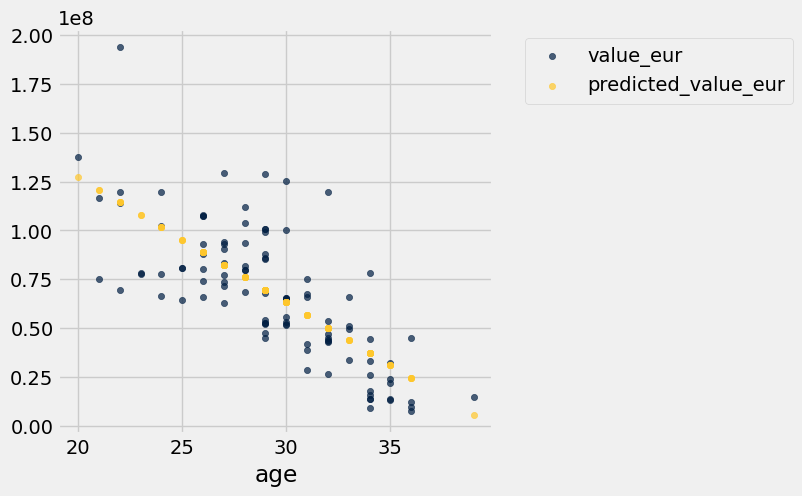

In [29]:
minimized_parameters = minimize(rmse)
lsq_slope = minimized_parameters[0]
lsq_intercept = minimized_parameters[1]

# This just prints your slope and intercept
print("Slope: {:g} | Intercept: {:g}".format(lsq_slope, lsq_intercept))

fifa_with_lsq_predictions = fifa.with_column(
    'predicted_value_eur',
    lsq_slope * fifa.column('age') + lsq_intercept
)

fifa_with_lsq_predictions.scatter('age', ['value_eur', 'predicted_value_eur'])


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

---

**Question 2.9.** The resulting line you found in 2.8 should appear very similar to the line you found in 2.3. Why were we able to minimize RMSE to find nearly the same slope and intercept from the previous formulas? **(5 points)**

*Hint:* Re-reading [15.3](https://inferentialthinking.com/chapters/15/3/Method_of_Least_Squares.html#the-least-squares-line) might be helpful here.


từ bao lâu rồi anh chẳng nhận lời yêu ai thêm nữa, chẳng quan tâm, chẳng mong nhớ âm thầm,
vì anh cũng đã từ nghĩ sâu, là ta sẽ bên nhau tận đến mai sau
thế nhưng ai ngờ được đâu, chuyện tình mang những u sầu
tình yêu ta đã gìn giữ một thời, giờ cơ sao lại như thế này, địt con mẹ nó

<!-- END QUESTION -->

---

**Question 2.10** For which of the following error functions would we have resulted in the same slope and intercept values in 2.8 instead of using RMSE? Assume `error` is assigned to the actual values minus the predicted values. **(5 points)**

1. `np.sum(error) ** 0.5`
2. `np.sum(error ** 2)`
3. `np.mean(error) ** 0.5`
4. `np.mean(error ** 2)`

Assign `error_array` to an array of your selections, in increasing numerical order. For example, if you wanted to select options 1, 3, and 5,
you would assign `error_array` to `make_array(1, 3, 5)`.

Hint: What was the purpose of RMSE? Are there any alternatives, and if so, does minimizing them them yield the same results as minimizing the RMSE? 

In [30]:
error_array = make_array(2,4)

In [31]:
grader.check("q2_10")

q2_10 results: All test cases passed!

In [32]:
# goalies don't have shooting in our dataset so we removed them before looking at the pace stat
no_goalies = fifa.where("shooting", are.above(0))
no_goalies

short_name,overall,value_eur,wage_eur,age,pace,shooting,passing,attacking_finishing
L. Messi,93,78000000,320000,34,85,92,91,95
R. Lewandowski,92,119500000,270000,32,78,92,79,95
Cristiano Ronaldo,91,45000000,270000,36,87,94,80,95
Neymar Jr,91,129000000,270000,29,91,83,86,83
K. De Bruyne,91,125500000,350000,30,76,86,93,82
K. Mbappé,91,194000000,230000,22,97,88,80,93
H. Kane,90,129500000,240000,27,70,91,83,94
N. Kanté,90,100000000,230000,30,78,66,75,65
K. Benzema,89,66000000,350000,33,76,86,81,90
H. Son,89,104000000,220000,28,88,87,82,88


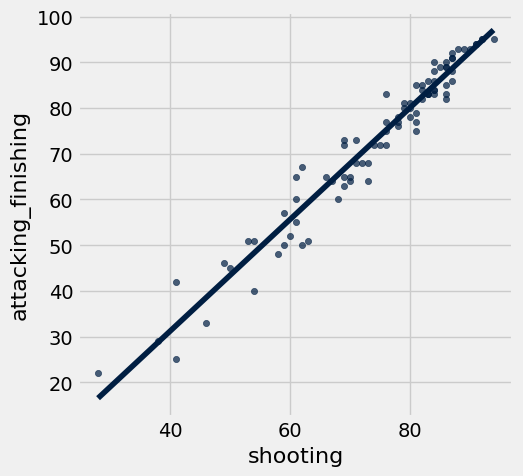

In [33]:
# Run this cell to generate a scatter plot for the next part.
no_goalies.scatter('shooting', 'attacking_finishing', fit_line=True)

---

**Question 2.11.** Above is a scatter plot showing the relationship between a player’s shooting ability (“shooting”) and their scoring ability (“attacking_finishing”). 

There is clearly a strong positive correlation between the 2 variables, and we’d like to predict a player’s scoring ability from their shooting ability. Which of the following are true, assuming linear regression is a reasonable model? **(5 points)**

*Hint:* Re-reading [15.2](https://inferentialthinking.com/chapters/15/2/Regression_Line.html#) might be helpful here.

1. For a majority of players with a `shooting` attribute above 80 our model predicts they have a better scoring ability than shooting ability.
2. A randomly selected player's predicted scoring ability in standard units will always be less than their shooting ability in standard units.
3. If we select a player who’s shooting ability is 1.0 in standard units, their scoring ability, on average, will be less than 1.0 in standard units.
4. Goalies have attacking_finishing scores in our dataset but do not have shooting scores. We can still use our model to predict their attacking_finishing scores.

Assign `scoring_array` to an array of your selections, in increasing numerical order. For example, if you wanted to select options 1, 3, and 5,
you would assign `scoring_array` to `make_array(1, 3, 5)`.


In [34]:
scoring_array = make_array(2,3)

In [35]:
grader.check("q2_11")

q2_11 results: All test cases passed!

You're done with Homework 10!  

**Important submission steps:** 
1. Run the tests and verify that they all pass.
2. Choose **Save Notebook** from the **File** menu, then **run the final cell**. 
3. Click the link to download the zip file.
4. Go to [Gradescope](https://www.gradescope.com) and submit the zip file to the corresponding assignment. The name of this assignment is "HW 10 Autograder". 

**It is your responsibility to make sure your work is saved before running the last cell.**

## Pets of Data 8
**Gucci and Dior** are so proud of you for finishing homework 10. They hope you have a great rest of your day!

<img src="./guccianddior.png" width="40%" alt="two maltese staring at camera"/>

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## Written Work Submission

Below, you will see two cells. Running the first cell will automatically generate a PDF of all questions that need to be manually graded, and running the second cell will automatically generate a zip with your autograded answers. You are responsible for submitting both the coding portion (the zip) and the written portion (the PDF) to their respective Gradescope portals. **Please save before exporting!**

> **Important: You must correctly assign the pages of your PDF after you submit to the correct gradescope assignment. If your pages are not correctly assigned and/or not in the correct PDF format by the deadline, we reserve the right to award no points for your written work.**

If there are issues with automatically generating the PDF in the first cell, you can try downloading the notebook as a PDF by clicking on `File -> Save and Export Notebook As... -> Webpdf`. If that doesn't work either, you can manually take screenshots of your answers to the manually graded questions and submit one single PDF of your screenshots. Either way, **you are responsible for ensuring your submision follows our requirements, we will NOT be granting regrade requests for submissions that don't follow instructions.**

**You must submit the PDF generated via one of these methods, we will not accept screenshots or Word documents.**

In [36]:
from otter.export import export_notebook
from os import path
from IPython.display import display, HTML
name = 'hw10'
export_notebook(f"{name}.ipynb", filtering=True, pagebreaks=True)
if(path.exists(f'{name}.pdf')):
    display(HTML(f"Download your PDF <a href='{name}.pdf' download>here</a>."))
else:
    print("\n Pdf generation failed, please try the other methods described above")

PandocMissing: Pandoc wasn't found.
Please check that pandoc is installed:
https://pandoc.org/installing.html

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [185]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False, run_tests=True)

Running your submission against local test cases...


Your submission received the following results when run against available test cases:

    q1_1 results: All test cases passed!

    q1_2 results: All test cases passed!

    q1_3 results: All test cases passed!

    q1_4 results: All test cases passed!

    q1_5 results: All test cases passed!

    q1_6 results: All test cases passed!

    q1_7 results: All test cases passed!

    q1_8 results: All test cases passed!

    q1_9 results: All test cases passed!

    q2_2 results: All test cases passed!

    q2_7 results: All test cases passed!

    q2_10 results: All test cases passed!

    q2_11 results: All test cases passed!
